# Project description
Urban mobility significantly contributes to global environmental impact. With the growth in urbanareas worldwide, cities are implementing policies to focus on sustainable urban and mobility devel-opment. Urban areas exhibit high variability in structure, economic output, mobility behaviour,among others. Pinpointing to the exact causes of emissions is impossible. However, understandingthe relationship of mobility with infrastructure resources and other urban indicators may help gov-ernments predict long-term mobility behaviour and intervene with future pathways into sustainablemobility options. </br>

Project goals: You are tasked to identify how mobility is related to the infrastructural form of acity and across multiple cities. Use your findings toward helping governments transform mobilitywithin cities for reducing environmental impacts of mobility use.
Data: </br>
1. Local city-wide indicators of urban mobility: Multi-city Traffic Datasetprovided publicly byThe Institute for Transport Planning and Systems at ETH Zurich.
2. Global city-wide indicators of urban mobility and environmental impacts:Urban TypologiesProject[Reference]3.Get indicators for infrastructure resources from OSMNX (street networks) and PYROSM(amenities and points of interest) python packages.High-level project goals1.Explore, Investigate, and Visualize various factors of the mobility data across cities of interest.2.Describe and incorporate additional data sources that you will use to help you understandrelationships between mobility and the built environment.
3. Identify correlations between mobility and the built environment.4.Perform clustering or LISA analysis on city streets where congestion may be related stronglywith the presence of certain amenities. Think about how that may vary with distance toamenities.
4. Or, train and evaluate models using the mobility data (either as predictors or as the primaryresponse in some fashion) and your data sources.
6. Use and interpret your models to discuss the causes and correlations of or effects due todifferences in congestion across cities or within a city of your choice.
7. Aggregate city-wide findings to correlate with environmental indicators used in data set (2) -urban typology - to comment on policy initiatives of the governments. (Think how you mayaggregate city-wide findings to a single score for the whole city to compare with indicatorsused in data set 

(2))Note: Not all data may be available for all cities. Hence, conduct this analysis for at least5citiesoverlapping between sets1and2in the data. You are welcome to do the analysis in many morecities.


In [1]:
# import 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pyrosm as py
import seaborn as sns
import pickle

### Load graphs

In [2]:
UTD19 = pd.read_csv('Data/detectors_public.csv') # read big file with all cities 
newcitylist= [ 'munich', 'rotterdam', 'frankfurt', 'hamburg', 'zurich'] # find only our cities for now, store in dataframe
UTD19Cities = UTD19.loc[UTD19.citycode.isin(newcitylist)] # UTD19Cities is dataframe

In [3]:
def GetGraphs(df):
    # function designed to extract bbox and create graphs with bbox
    clist = df.citycode.unique()
    GraphList = []
    for i in clist:
        maxlonglt = df.loc[df.citycode == i, ['long', 'lat']].max() # maxlonglat[0] = long, 1 lat
        minlonglt = df.loc[df.citycode == i, ['long', 'lat']].min() #
        north = maxlonglt[1] 
        south = minlonglt[1]
        east = maxlonglt[0]
        west = minlonglt[0]
        A = ox.graph.graph_from_bbox(north, south, east, west, network_type='drive')
        GraphList.append(A)
    return GraphList
        
Graphs = GetGraphs(UTD19Cities)

### Load POIS

In [4]:
# de filepaths zin nu specifiek voor mijn computer, moet je zelf even aanpassen naar waar die van jou staan
fp_rotterdam ="data/rotterdam.osm.pbf"
fp_munich ="data/munich.osm.pbf"
fp_zurich ="data/zurich.osm.pbf"
fp_hamburg ="data/hamburg.osm.pbf"
fp_frankfurt ="data/frankfurt.osm.pbf"

C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  osm_keys=None,
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\pyrosm\pois.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

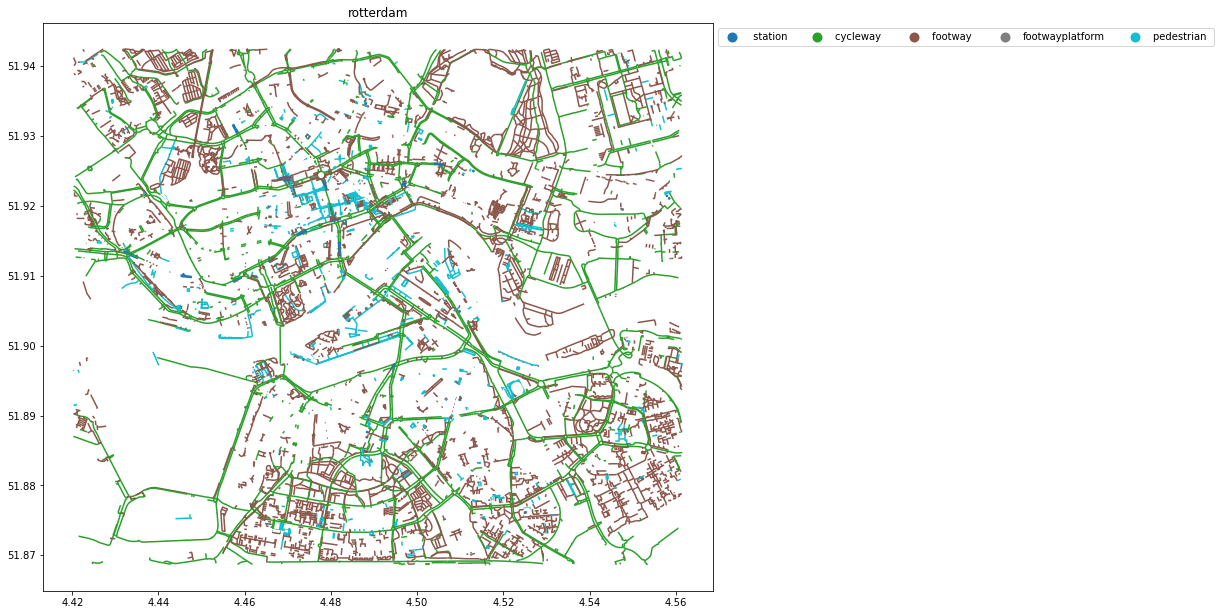

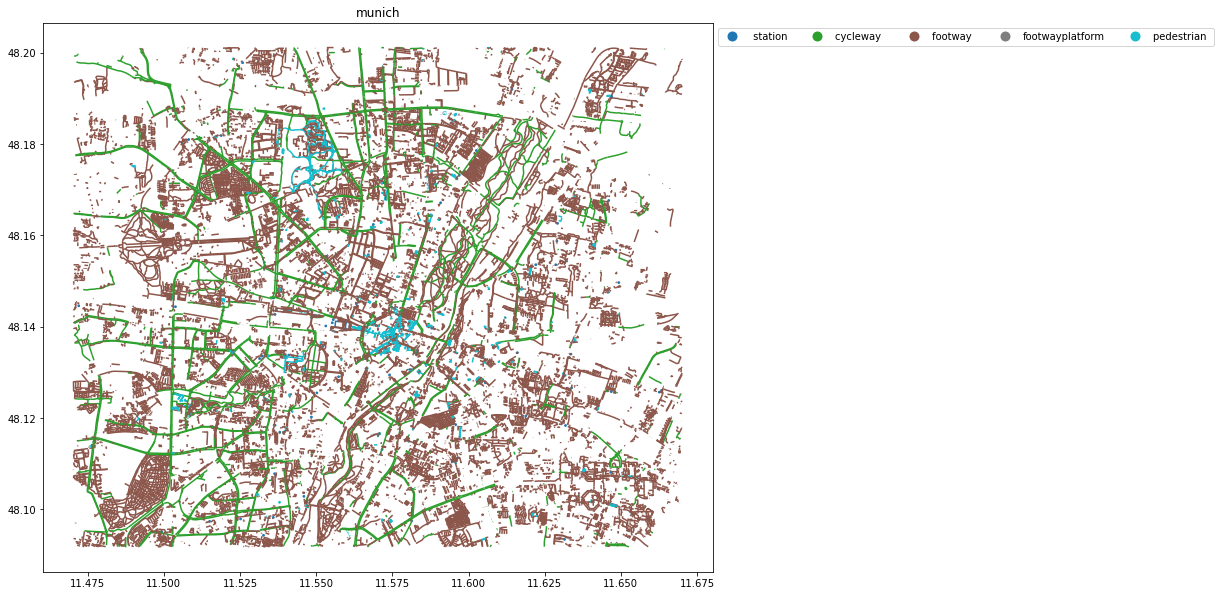

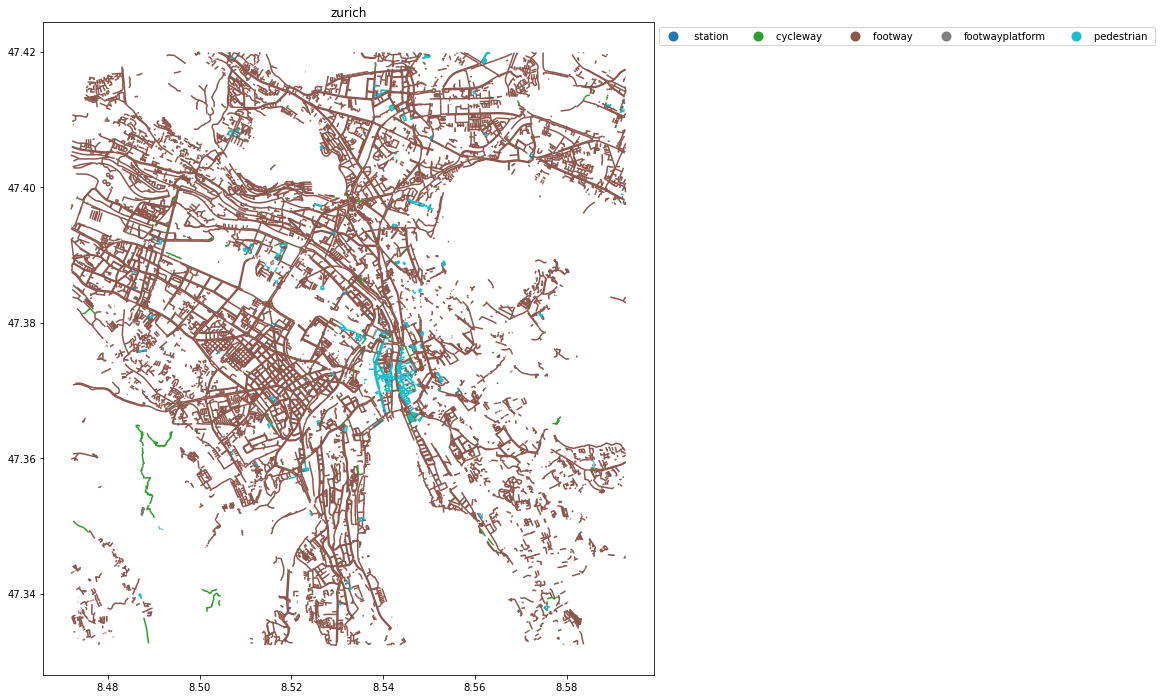

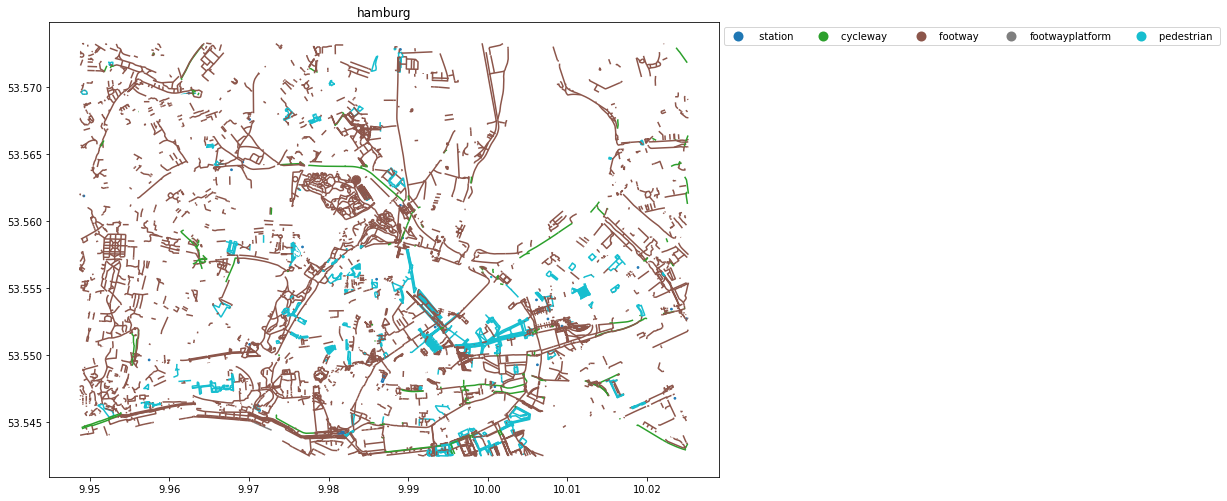

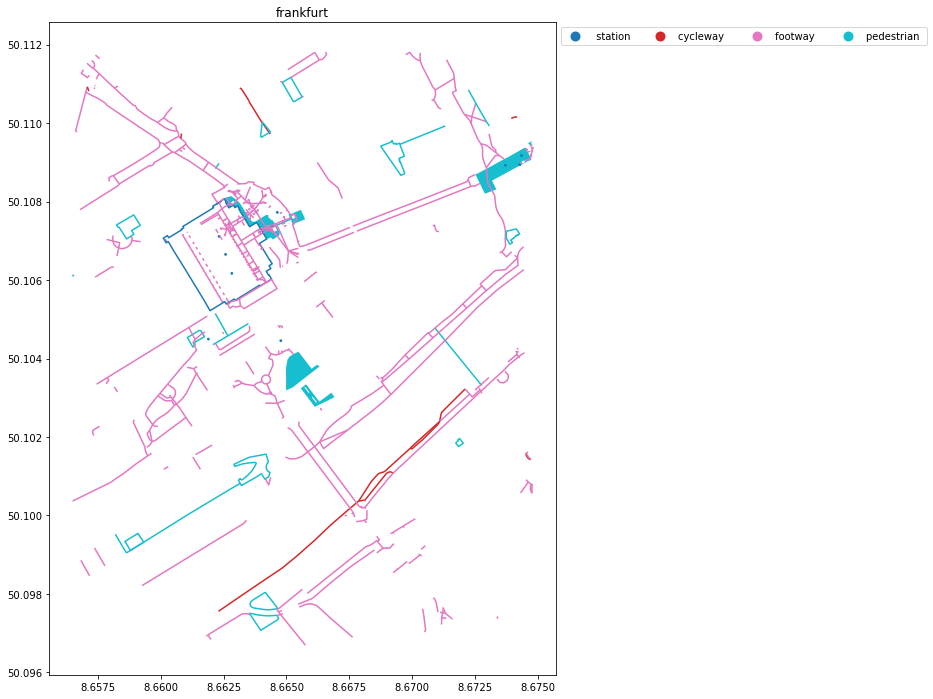

In [5]:
#alternative transport options
PoisDic = dict()
for i,v in [(fp_rotterdam, 'rotterdam'), (fp_munich, 'munich') , (fp_zurich, 'zurich'), (fp_hamburg, 'hamburg'), (fp_frankfurt, 'frankfurt')]:    # Initiliaze with bounding box
    osm = py.OSM(filepath=i)

    # By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
    # Here, let's read only "amenity" and "shop" by applying a custom filter that
    # overrides the default filtering mechanism
    custom_filter = {'public_transport': ['station'], 'highway': ['pedestrian', 'footway', 'cycleway', 'busway']}
    pois = osm.get_pois(custom_filter=custom_filter)

    # Gather info about POI type (combines the tag info from "amenity" and "shop")
    pois["public_transport"] = pois["public_transport"].fillna(" ")
    pois["highway"] = pois["highway"].fillna(" ")
    pois["poi_type"] = pois["highway"] + pois['public_transport']
    
    # save pois in dict
    PoisDic[v] = pois

    # Plot
    ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
    ax.set_title(v)
    pois.head()

In [6]:
PoisDic['rotterdam'].head() # stored in dataframe

version                                               tags       lon  \
0        0              {"bus":"yes","amenity":"bus_station"}  4.558490   
1        0  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421   
2        0  {"zone":"5300","subway":"yes","railway":"stati...  4.480911   
3        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148   
4        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973   

   changeset        lat          id  timestamp addr:country  \
0        0.0  51.921089  1889797480          0         None   
1        0.0  51.887630  2032859196          0         None   
2        0.0  51.917953  3149917961          0         None   
3        0.0  51.930611  3149917962          0           NL   
4        0.0  51.914028  3149917967          0         None   

                name                                 operator  ... service  \
0  Capelsebrug Metro                                     None  ...     NaN   
1          Zuidplein                                     None  ...     NaN   
2              Beurs  Rotterdamse Elektrische Tram N.V. (RET)  ...     NaN   
3           Blijdorp                                      RET  ...     NaN   
4         Leuvehaven                                      RET  ...     NaN   

  segregated sidewalk smoothness surface tracktype tunnel width website  \
0        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
1        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
2        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
3        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
4        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   

   poi_type  
0   station  
1   station  
2   station  
3   station  
4   station  

[5 rows x 40 columns]

# Save POI pickle

In [7]:
with open('POI.pickle', 'wb') as handle:
    pickle.dump(PoisDic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
## Load POI pickle
# Load data (deserialize)
with open('POI.pickle', 'rb') as handle:
    poi_dic = pickle.load(handle)

### Load pickle

In [11]:
# Load data (deserialize)
with open('Edges.pickle', 'rb') as handle:
    dic = pickle.load(handle)

dic['rotterdam'].head()


osmid                     name      highway  \
0  [311806104, 311806106, 321898179]             's-Gravenweg  residential   
1                            7514536       Frans Bekkerstraat  residential   
2                            7515679       Frans Bekkerstraat  residential   
3                 [7515714, 7515628]            Verboomstraat  residential   
4                            7319072  Schultz van Hagenstraat  residential   

   oneway   length bridge                                           geometry  \
0   False   88.311    yes  LINESTRING (4.52452 51.92392, 4.52412 51.92331...   
1   False   61.119    NaN    LINESTRING (4.46527 51.89180, 4.46613 51.89165)   
2   False   76.835    NaN  LINESTRING (4.46527 51.89180, 4.46496 51.89218...   
3   False  145.552    NaN  LINESTRING (4.46527 51.89180, 4.46528 51.89177...   
4   False   48.438    NaN    LINESTRING (4.52872 51.92385, 4.52848 51.92344)   

  maxspeed lanes  ref junction tunnel access         u          v  key detid  
0      NaN   NaN  NaN      NaN    NaN    NaN  44417024  771255062    0   NaN  
1      NaN   NaN  NaN      NaN    NaN    NaN  44269570   44269098    0   NaN  
2       50   NaN  NaN      NaN    NaN    NaN  44269570  963879003    0   NaN  
3       50   NaN  NaN      NaN    NaN    NaN  44269570   44262667    0   NaN  
4      NaN   NaN  NaN      NaN    NaN    NaN  44417028   44412933    0   NaN

### Load flows

In [4]:
data_frankfurt = pd.read_csv('data\\UTD_f.csv')
data_hamburg = pd.read_csv('data/UTD_h.csv')
data_munich = pd.read_csv('data\\UTD_m.csv')
data_rotterdam = pd.read_csv('data\\UTD_r.csv')
data_zurich = pd.read_csv('data\\UTD_z.csv')

In [5]:
frankfurt_detid_average = (data_frankfurt.groupby('detid').flow.mean()).to_frame(name = None)
hamburg_detid_average = (data_hamburg.groupby('detid').flow.mean()).to_frame(name = None)
munich_detid_average = (data_munich.groupby('detid').flow.mean()).to_frame(name = None)
rotterdam_detid_average = (data_rotterdam.groupby('detid').flow.mean()).to_frame(name = None)
zurich_detid_average = (data_zurich.groupby('detid').flow.mean()).to_frame(name = None)

In [6]:
frankfurt_detid_average['city'] = 'frankfurt'
hamburg_detid_average['city'] = 'hamburg'
munich_detid_average['city'] = 'munich'
rotterdam_detid_average['city'] =  'rotterdam'
zurich_detid_average['city'] = 'zurich'

In [7]:
# most Functions dont use this
Mean_perdetid = pd.concat([frankfurt_detid_average,
                                  hamburg_detid_average,
                                  munich_detid_average,
                                  rotterdam_detid_average,
                                  zurich_detid_average])
          

In [8]:
result = Mean_perdetid.to_csv('data\\UTD_Mean_Flow_per_detid.csv', index = True)#exporting data frame as csv file.

### Load flows as edge atributes

In [9]:
# try plotting the flow on the OSMNX graph
hamburg_detid_average.reset_index(inplace = True)
frankfurt_detid_average.reset_index(inplace = True)
munich_detid_average.reset_index(inplace = True)
rotterdam_detid_average.reset_index(inplace = True)
zurich_detid_average.reset_index(inplace = True)

#df['ColumnID'] = df['ColumnID'].astype(str)
munich_detid_average.detid = munich_detid_average.detid.astype(str)

In [12]:
H = dic['hamburg']
def Match(detid, df):
    if type(detid) == str:
        flowval = df.loc[df.detid == detid, 'flow'].values # get specific value
        try:
            flowval = float(flowval) # convert array to float
            return flowval
        except:
            # list empty
            return np.nan
    
    
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])
#H['detid'].apply(Match, args = [hamburg_detid_average])
    

In [13]:
F = dic['frankfurt']
# H = dic['Hamburg'] # skip, allready done
M = dic['munich']
R = dic['rotterdam']
Z = dic['zurich']

F['flow'] = F['detid'].apply(Match, args = [frankfurt_detid_average])
M['flow'] = M['detid'].apply(Match, args = [munich_detid_average])
R['flow'] = R['detid'].apply(Match, args = [rotterdam_detid_average])
Z['flow'] = Z['detid'].apply(Match, args = [zurich_detid_average])
H['flow'] = H['detid'].apply(Match, args = [hamburg_detid_average])


C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. 

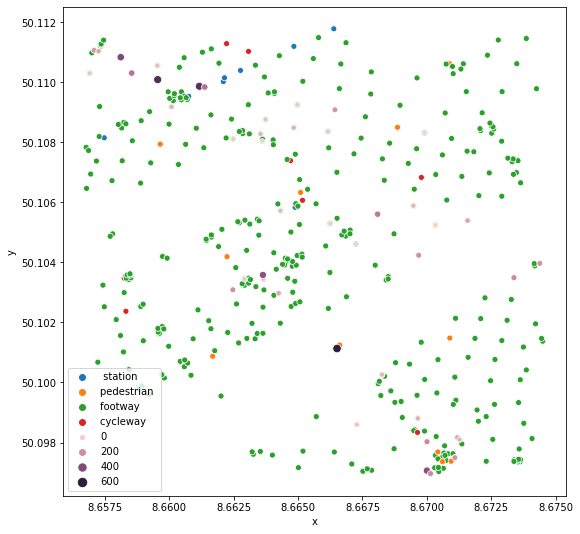

In [18]:
f, ax = plt.subplots(figsize=(9,9))
pois['x'] = F.geometry.centroid.x
pois['y'] = F.geometry.centroid.y
sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois, hue = pois['poi_type'].to_list())
F['x'] = F.geometry.centroid.x
F['y'] = F.geometry.centroid.y
flows = sns.scatterplot(x = 'x', y = 'y', ax =ax , data = F, hue = F['flow'].to_list(), size = F['flow'].to_list())
#plt.colorbar(flows)
#ax.legend()

C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
C:\Users\Fabia\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry i

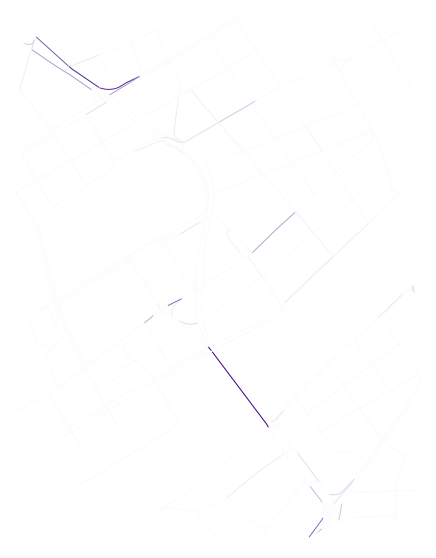

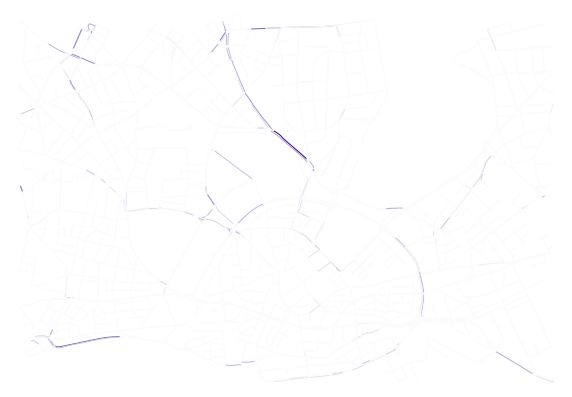

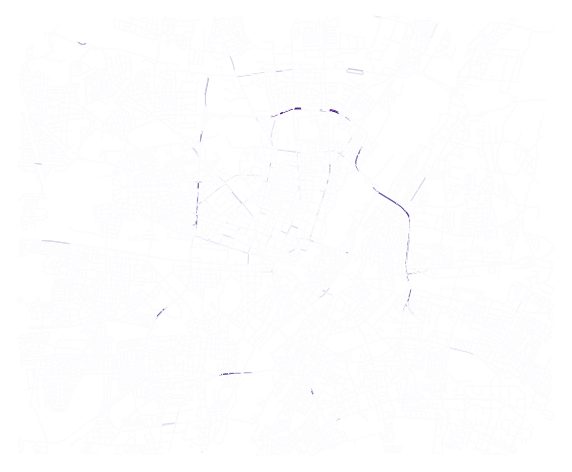

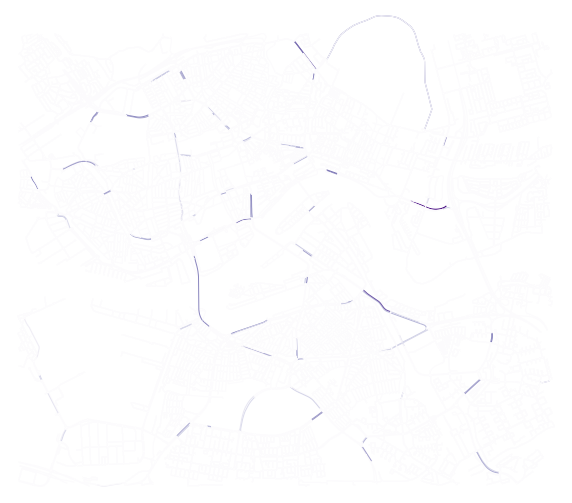

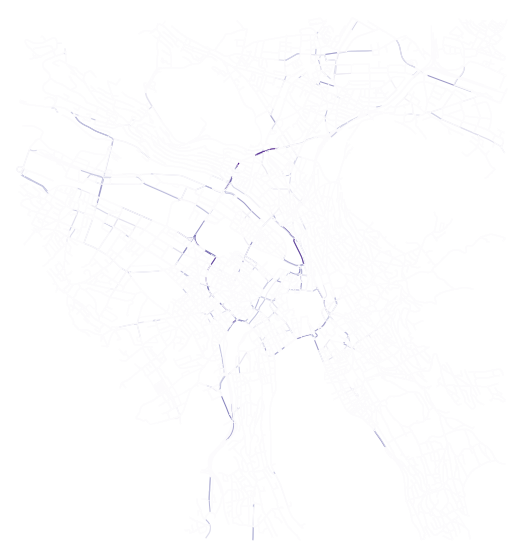

In [19]:
FlowDict = {'rotterdam':R ,'zurich': Z,'munich':M, 'frankfurt':F, 'hamburg':H}

def CreatePlots(GList, PDict, Clist = UTD19Cities.citycode.unique(), flowdict = FlowDict): 
    # need to run UTD19Cities, GetGraphs and need the POIS Dic
    for number,city in enumerate(Clist):
        GraphCity = GList[number]
        # plot build enviroment vs traffic flows 
        pois = PoisDic[city]
        pois['x'] = pois.geometry.centroid.x
        pois['y'] = pois.geometry.centroid.y
        
        N_d, remove = ox.graph_to_gdfs(GraphCity)
        Edge_df = FlowDict[city] # retrieve edge data
        Edge_df['flow'] = Edge_df.flow.fillna(0) # necessary for plotting colors
        New = ox.graph_from_gdfs(N_d, Edge_df, graph_attrs={'edge_attr': ['detid', 'flow']} )
        New.graph['crs'] = GraphCity.graph['crs']

        # setup plot
        f, ax = plt.subplots(figsize = (10,10))
        ec = ox.plot.get_edge_colors_by_attr(New, attr='flow', cmap='Purples') # set color scale by atribute (now length could be any other variable)
        z = ox.plot_graph(New, edge_color= ec, node_size=1, ax =ax, show = False, close = False) # edgecolor is stored in ec
        # uncomment line below if build enviroment also neccessary
        #sns.scatterplot(x = 'x', y = 'y', ax = ax, data = pois , hue = pois['poi_type'].to_list(), alpha = 0.3, size = 0.3)
 
        
CreatePlots(Graphs, PoisDic)

# Spatial weights (rough)
Example FrankFurt

In [82]:
# retrieve Pois dic
pois = poi_dic['rotterdam']
pois.crs # crs is still in degrees -> reprojection necessary

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
pois = pois.to_crs('EPSG:4839')
pois.crs # worked, now in metres

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [84]:
pois.head()

version                                               tags       lon  \
0        0              {"bus":"yes","amenity":"bus_station"}  4.558490   
1        0  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421   
2        0  {"zone":"5300","subway":"yes","railway":"stati...  4.480911   
3        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148   
4        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973   

   changeset        lat          id  timestamp addr:country  \
0        0.0  51.921089  1889797480          0         None   
1        0.0  51.887630  2032859196          0         None   
2        0.0  51.917953  3149917961          0         None   
3        0.0  51.930611  3149917962          0           NL   
4        0.0  51.914028  3149917967          0         None   

                name                                 operator  ... service  \
0  Capelsebrug Metro                                     None  ...     NaN   
1          Zuidplein                                     None  ...     NaN   
2              Beurs  Rotterdamse Elektrische Tram N.V. (RET)  ...     NaN   
3           Blijdorp                                      RET  ...     NaN   
4         Leuvehaven                                      RET  ...     NaN   

  segregated sidewalk smoothness surface tracktype tunnel width website  \
0        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
1        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
2        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
3        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   
4        NaN      NaN        NaN     NaN       NaN    NaN   NaN     NaN   

   poi_type  
0   station  
1   station  
2   station  
3   station  
4   station  

[5 rows x 40 columns]

In [ ]:
from pysal.lib import weights
# get projections in meters
pois['X'] = pois.geometry.centroid.x
pois['Y'] = pois.geometry.centroid.y

# calculate using array, if binary = True -> 1 if neighbour, threshold in meters
%time w = weights.distance.DistanceBand.from_array(pois[['X','Y']], threshold = 250, binary = False) 
w[0] # example of w

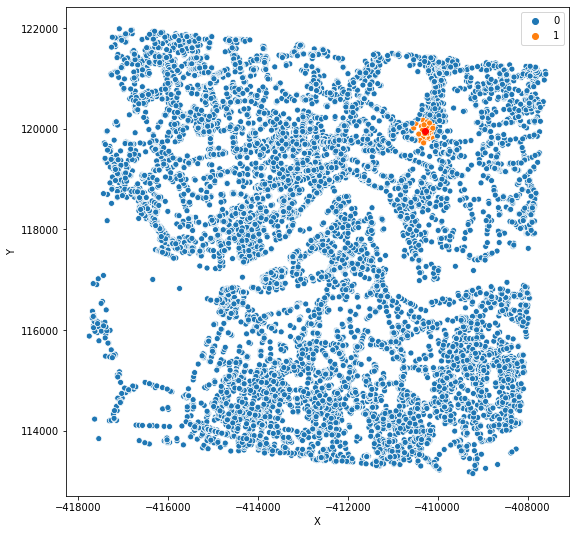

In [24]:
# Validation of W
# Setup figure
f, ax = plt.subplots(1, figsize=(9, 9))
# get neighbours
neis = w[300]
pois['neis'] = 0

for key in neis.keys():
    pois.loc[key,'neis'] = 1 # if neighbour is 1, otherwise 0 
# Plot base layer of polygons
sns.scatterplot(x= 'X', y = 'Y', ax=ax, data = pois, hue = pois['neis'].to_list())
# get first one -> plot in red
data = pois.iloc[300][['X','Y']]
ax.scatter(data.X, data.Y, color = 'red')

# DBSCAN

In [18]:
# retrieve Pois dic
pois = poi_dic['rotterdam']
pois.crs # crs is still in degrees -> reprojection necessary

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# need to go te meters
pois = pois.to_crs('EPSG:4839')
pois.crs # worked, now in metres

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:xlabel='X', ylabel='Y'>

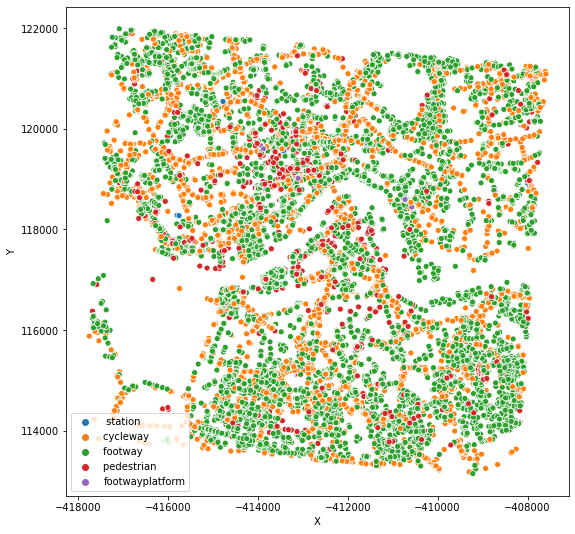

In [20]:
pois['X'] = pois.geometry.centroid.x # calculate x and y in metres
pois['Y'] = pois.geometry.centroid.y

# plot to show it worked
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['poi_type'].to_list())

0        4.558490
1        4.488421
2        4.480911
3        4.458148
4        4.481973
           ...   
10993    4.519430
10994    4.537591
10995    4.536529
10996    4.439378
10997    4.458771
Name: X, Length: 10998, dtype: float64

In [25]:
# run DB scan
from sklearn.cluster import DBSCAN
algo = DBSCAN(eps=300, min_samples=50) # eps = 100 m, samples 50

# fit
algo.fit(pois[["X", "Y"]])

DBSCAN(eps=300, min_samples=50)

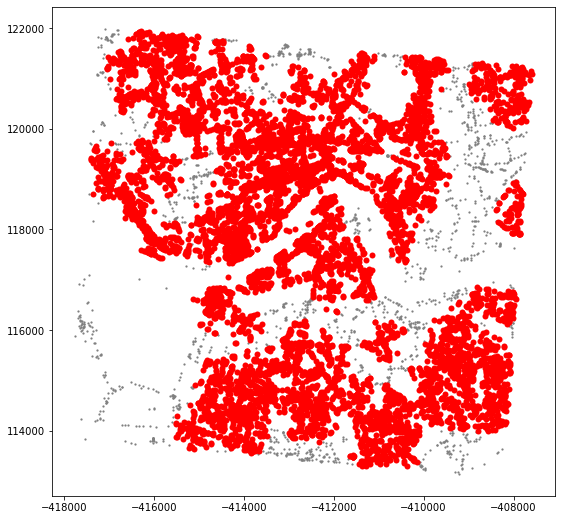

In [26]:
lbls = pd.Series(algo.labels_, index=pois.index)

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Assign labels to tokyo table dynamically and
# subset points that are not part of any cluster (noise)
noise = pois.assign(lbls=lbls)\
             .query("lbls == -1")
# Plot noise in grey
ax.scatter(noise["X"], 
           noise["Y"], 
           c='grey', 
           s=5, 
           linewidth=0
          )
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(pois.loc[pois.index.difference(noise.index), 
                     "X"
                    ], 
           pois.loc[pois.index.difference(noise.index), 
                     "Y"
                    ],
           c="red", 
           linewidth=0
          )
# Display the figure
plt.show()



In [27]:
pois['labels'] = lbls
# add labels to main dataframe
pois.head() # works

version                                               tags       lon  \
0        0              {"bus":"yes","amenity":"bus_station"}  4.558490   
1        0  {"bus":"yes","zone":"5175","source":"Arriva","...  4.488421   
2        0  {"zone":"5300","subway":"yes","railway":"stati...  4.480911   
3        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.458148   
4        0  {"zone":"5300","subway":"yes","network":"Rail ...  4.481973   

   changeset        lat          id  timestamp addr:country  \
0        0.0  51.921089  1889797480          0         None   
1        0.0  51.887630  2032859196          0         None   
2        0.0  51.917953  3149917961          0         None   
3        0.0  51.930611  3149917962          0           NL   
4        0.0  51.914028  3149917967          0         None   

                name                                 operator  ... smoothness  \
0  Capelsebrug Metro                                     None  ...        NaN   
1          Zuidplein                                     None  ...        NaN   
2              Beurs  Rotterdamse Elektrische Tram N.V. (RET)  ...        NaN   
3           Blijdorp                                      RET  ...        NaN   
4         Leuvehaven                                      RET  ...        NaN   

  surface tracktype tunnel width website  poi_type              X  \
0     NaN       NaN    NaN   NaN     NaN   station -407969.115106   
1     NaN       NaN    NaN   NaN     NaN   station -413073.438120   
2     NaN       NaN    NaN   NaN     NaN   station -413312.694698   
3     NaN       NaN    NaN   NaN     NaN   station -414756.743713   
4     NaN       NaN    NaN   NaN     NaN   station -413275.614330   

               Y labels  
0  118874.497908      3  
1  115558.422116      0  
2  118960.316297      1  
3  120490.850901      1  
4  118519.433943      1  

[5 rows x 43 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

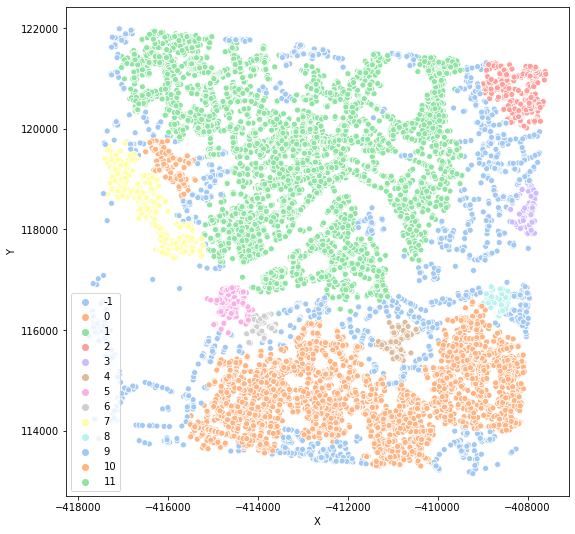

In [28]:
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['labels'].to_list(), palette=('pastel'))

In [29]:
# try grouping by
TypeInCluster = pois.groupby('labels').poi_type.unique()

In [30]:
TypeInCluster # see roughly what is in each cluster

labels
-1     [ station, cycleway , footway , pedestrian , f...
 0          [ station, cycleway , footway , pedestrian ]
 1     [ station, cycleway , footway , pedestrian , f...
 2          [ station, cycleway , footway , pedestrian ]
 3                       [ station, cycleway , footway ]
 4                    [cycleway , footway , pedestrian ]
 5                    [footway , cycleway , pedestrian ]
 6                    [cycleway , footway , pedestrian ]
 7          [cycleway , footway , pedestrian ,  station]
 8                    [cycleway , footway , pedestrian ]
 9                    [cycleway , footway , pedestrian ]
 10                   [cycleway , footway , pedestrian ]
 11                   [footway , cycleway , pedestrian ]
Name: poi_type, dtype: object

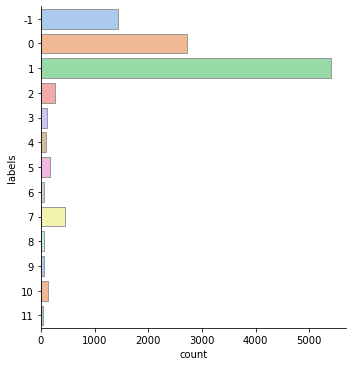

In [31]:
# try a plot?
# few areas with smaller clusters
sns.catplot(y="labels", kind="count",
            palette="pastel", edgecolor=".6",
            data=pois)

In [32]:
# how to link flows with clusters?
# what are the properties of each cluster? -> being close to each other/

# idea; get detector data
RotterdamDet = gpd.GeoDataFrame(UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam'])

# call match -> link flow to det id and long lat        
RotterdamDet['flow'] = RotterdamDet.detid.apply(Match, args = [rotterdam_detid_average])
RotterdamDet.head() # works :)


detid    length       pos     fclass  \
16321  GRT02_MORO_1811_2_1  0.373911  0.307366  secondary   
16322  GRT02_MORO_1822_2_1  1.041926  0.533046  secondary   
16323  GRT02_MORO_1293_2_1  0.168822  0.074032  secondary   
16324  GRT02_MORO_1293_2_2  0.168822  0.074032  secondary   
16325  GRT02_MORO_1851_2_1  0.589675  0.148455      trunk   

                          road limit   citycode  lanes  linkid      long  \
16321          Kreekhuizenlaan    50  rotterdam    1.0   100.0  4.539146   
16322  Groeninx van Zoelenlaan    80  rotterdam    1.0    90.0  4.561430   
16323                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16324                Schiekade    50  rotterdam    1.0    47.0  4.475207   
16325                  Vaanweg    50  rotterdam    1.0    96.0  4.512462   

             lat        flow  
16321  51.884051  392.931968  
16322  51.884623  339.342356  
16323  51.927265  385.277249  
16324  51.927265  280.088515  
16325  51.874034  342.891002

In [33]:
#df2_gdf = geopandas.GeoDataFrame(
#    df2, geometry=geopandas.points_from_xy(df2.long, df2.lat))
RotterdamDet['geometry'] = gpd.points_from_xy(RotterdamDet.long, RotterdamDet.lat)

In [34]:
RotterdamDet.crs = 'EPSG:4326'
RotterdamDet = RotterdamDet.to_crs('EPSG:4839')

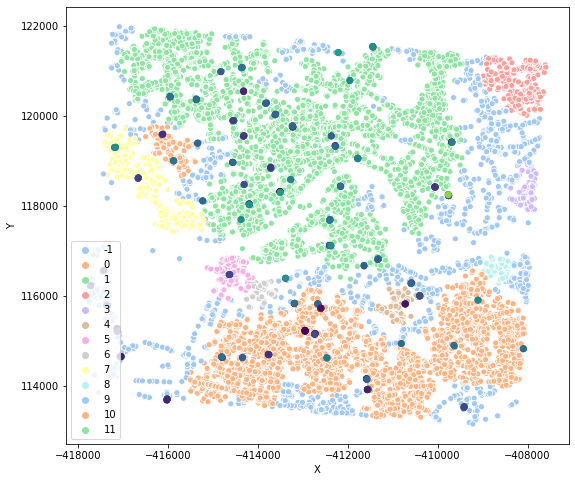

In [35]:
f, ax = plt.subplots(figsize = (9,9))
sns.scatterplot('X', 'Y', data = pois, ax=ax, hue = pois['labels'].to_list(), palette=('pastel'))
# for scatter make RotterdamDet to meter projection
z = RotterdamDet.plot('flow', cmap = 'viridis', ax=ax)
#plt.colorbar(z)

## Fabian spatial poging

In [36]:
#RotterdamDet = UTD19Cities.loc[UTD19Cities.citycode == 'rotterdam']
RotterdamDet=RotterdamDet.rename(columns={'long':'x','lat':'y'})

In [37]:
RotterdamDet['X'] = RotterdamDet.geometry.centroid.x # calculate x and y in metres
RotterdamDet['Y'] = RotterdamDet.geometry.centroid.y
RotterdamDet=RotterdamDet.loc[:,['detid','X','Y','flow']]


In [38]:
RotterdamDet=RotterdamDet.rename(columns={'detid':'id'})

In [39]:
RotterdamDet.reset_index(inplace=True, drop=True)

In [45]:
RotterdamDet.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [67]:
pois = poi_dic['rotterdam']
pois = pois.to_crs('EPSG:4839')

In [68]:
pois.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [69]:
pois['X'] = pois.geometry.centroid.x
pois['Y'] = pois.geometry.centroid.y

In [72]:
pois['flow']=0
pois=gpd.GeoDataFrame(pois[['id','X','Y']])

In [73]:
type(pois)

geopandas.geodataframe.GeoDataFrame

In [58]:
b = RotterdamDet.shape[0]

In [59]:
print (a+b, pois_and_detec.shape) # Shape klopt

11257 (11257, 4)


In [46]:
#works,but too slow...
# w_dict_r={}
# for i,node in enumerate(RotterdamDet.id):
#     pois_node=pois.append(RotterdamDet.iloc[i])
#     w = weights.distance.DistanceBand.from_array(pois[['X','Y']], threshold = 500, binary = False)
#     w_dict_r[node]=w[len(pois_c)-1]
#     print(i)

In [322]:
pois_and_detec=pois.append(RotterdamDet, ignore_index=True)
#pois_and_detec.iloc[(len(pois)-2):(len(pois)+2)]
#check vanaf welke we willen hebben straks
#pois_and_detec.loc[pois_and_detec.flow.notnull() == True] # heel veel vars zonder flow zijn natuurlijk pois :)
pois_and_detec

id              X              Y        flow  \
0               1889797480 -407969.115106  118874.497908         NaN   
1               2032859196 -413073.438120  115558.422116         NaN   
2               3149917961 -413312.694698  118960.316297         NaN   
3               3149917962 -414756.743713  120490.850901         NaN   
4               3149917967 -413275.614330  118519.433943         NaN   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry  
0              NaN         NaN                            None  
1              NaN         NaN                            None  
2              NaN         NaN                            None  
3              NaN         NaN                            None  
4              NaN         NaN                            None  
...            ...         ...                             ...  
11252        163.0  513.232626  POINT (-409106.593 115900.975)  
11253        103.0  499.160471  POINT (-412158.230 118430.894)  
11254        103.0  499.160471  POINT (-412158.230 118430.894)  
11255         32.0  564.433065  POINT (-412215.181 121408.128)  
11256        243.0  286.948915  POINT (-414307.298 118476.877)  

[11257 rows x 7 columns]

In [83]:
pois_and_detec.crs = 'EPSG:4839'

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  """Entry point for launching an IPython kernel.


In [84]:
pois_and_detec.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [85]:
%time from pysal.lib import weights

Wall time: 0 ns


In [149]:
R = weights.distance.DistanceBand.from_array(RotterdamDet[['X','Y']], threshold = 500, binary = True)
R.transform = 'R'
NeihbourList = []
for i in RotterdamDet.index:
    NeihbourList.append( sum (R[i].values()))
NeihbourList[:4]

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 46 disconnected components.
  warnings.warn(message)


[1.0, 1.0, 0.9999999999999997, 0.9999999999999997]

In [292]:
%time RotterdamDet['lag'] = weights.lag_spatial(R, RotterdamDet['flow'])

#br['w_Pct_Leave'] = weights.lag_spatial(w, br['Pct_Leave'])

RotterdamDet.tail()

Wall time: 2 ms


id              X              Y        flow  \
254  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
255  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
256  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
257  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
258  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

     spacial_val         lag                        geometry  
254        163.0  513.232626  POINT (-409106.593 115900.975)  
255        103.0  499.160471  POINT (-412158.230 118430.894)  
256        103.0  499.160471  POINT (-412158.230 118430.894)  
257         32.0  564.433065  POINT (-412215.181 121408.128)  
258        243.0  286.948915  POINT (-414307.298 118476.877)

<AxesSubplot:xlabel='flow', ylabel='lag'>

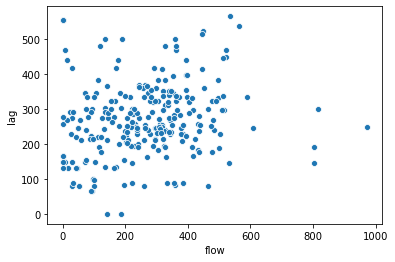

In [151]:
sns.scatterplot(x = 'flow', y = 'lag', data = RotterdamDet)

In [172]:
%time w = weights.distance.DistanceBand.from_array(pois_and_detec[['X','Y']], threshold = 500, binary = False)
w.transform = 'R'
#pois_and_detec['lag'] = weights.lag_spatial(w, pois_and_detec['flow'])

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\scipy\sparse\data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


Wall time: 7.72 s
('WARNING: ', 7229, ' is an island (no neighbors)')
('WARNING: ', 10996, ' is an island (no neighbors)')


In [194]:
# problem pois have no flow 
# need to assign a flow to pois

# idea: take the spatial weights and flow of detectors closeby; flow is spatially lagged of flows of detectors that are neighbours

# get only the weights of detectors close by?
RotterdamDet['geometry'] = gpd.points_from_xy(RotterdamDet.X, RotterdamDet.Y)
z = weights.distance.DistanceBand.from_dataframe(RotterdamDet, threshold =500, ids='id')
z.transform = 'R'

In [ ]:
z['GRT02_MORO_1293_2_1']

In [323]:
pois_and_detec['geometry'] = gpd.points_from_xy(pois_and_detec.X, pois_and_detec.Y)
#z = weights.distance.DistanceBand.from_dataframe(pois_and_detec, threshold =500, ids='id')
#z.transform = 'R'

In [325]:
new = {}
for i in pois_and_detec.id:
    x = dict(z[i])
    f = {}
    for j in x.keys():
        if type(j) == str:
            f[j] = 1
    if bool(f) == True:
        AmountOfNeis = len(f.values())
        for key in f.keys():
            f[key] = (1/AmountOfNeis) # row standardise
    new[i] = f
    

# new is a dict with spatial weights


In [326]:
#%time ['lag'] = weights.lag_spatial(R, RotterdamDet['flow'])
def SpatialLag(dic, df):
    df['LagFlow'] = np.nan
    for key in dic.keys():
        spatial = []
        #flow = df.loc[df['id'] == key, 'flow']
        if bool(dic[key]) == True: # dic is not empty
            z = dic[key]
            for detid in z.keys():
               #detid
                flow = df.loc[df.id == detid, 'flow'].values # flow of detid
                weight = z[detid] # WEIGHT
                spat = flow*weight # spatial thing
                spat = float(spat)
                spatial.append(spat)
            
            df.loc[df.id == key, 'LagFlow'] = sum(spatial)            
    return df
        
        
        
s = SpatialLag(new, pois_and_detec)

In [337]:
f = gpd.GeoDataFrame(s)

In [338]:
f

id              X              Y        flow  \
0               1889797480 -407969.115106  118874.497908         NaN   
1               2032859196 -413073.438120  115558.422116  134.560407   
2               3149917961 -413312.694698  118960.316297  336.157523   
3               3149917962 -414756.743713  120490.850901  160.204828   
4               3149917967 -413275.614330  118519.433943  276.345282   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry     LagFlow  
0              NaN         NaN  POINT (-407969.115 118874.498)         NaN  
1              NaN         NaN  POINT (-413073.438 115558.422)  134.560407  
2              NaN         NaN  POINT (-413312.695 118960.316)  336.157523  
3              NaN         NaN  POINT (-414756.744 120490.851)  160.204828  
4              NaN         NaN  POINT (-413275.614 118519.434)  276.345282  
...            ...         ...                             ...         ...  
11252        163.0  513.232626  POINT (-409106.593 115900.975)  513.232626  
11253        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471  
11254        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471  
11255         32.0  564.433065  POINT (-412215.181 121408.128)  564.433065  
11256        243.0  286.948915  POINT (-414307.298 118476.877)  286.948915  

[11257 rows x 8 columns]

In [339]:
def assignFlow(detid, df): 
    if type(detid) != str:
        p = df.loc[df.id == detid, 'LagFlow'].values
        p = float(p)
        return p
    else:
        p = df.loc[df.id == detid, 'flow'].values
        p = float(p)
        return p
        
f['flow'] = f.id.apply(assignFlow, args=[f])

In [340]:
f

id              X              Y        flow  \
0               1889797480 -407969.115106  118874.497908         NaN   
1               2032859196 -413073.438120  115558.422116  134.560407   
2               3149917961 -413312.694698  118960.316297  336.157523   
3               3149917962 -414756.743713  120490.850901  160.204828   
4               3149917967 -413275.614330  118519.433943  276.345282   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry     LagFlow  
0              NaN         NaN  POINT (-407969.115 118874.498)         NaN  
1              NaN         NaN  POINT (-413073.438 115558.422)  134.560407  
2              NaN         NaN  POINT (-413312.695 118960.316)  336.157523  
3              NaN         NaN  POINT (-414756.744 120490.851)  160.204828  
4              NaN         NaN  POINT (-413275.614 118519.434)  276.345282  
...            ...         ...                             ...         ...  
11252        163.0  513.232626  POINT (-409106.593 115900.975)  513.232626  
11253        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471  
11254        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471  
11255         32.0  564.433065  POINT (-412215.181 121408.128)  564.433065  
11256        243.0  286.948915  POINT (-414307.298 118476.877)  286.948915  

[11257 rows x 8 columns]

In [341]:
sub = weights.distance.DistanceBand.from_dataframe(f, threshold =500, ids='id')
sub.transform = 'R'

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 495617279, 9927671035.
  warnings.warn(message)


('WARNING: ', 495617279, ' is an island (no neighbors)')
('WARNING: ', 9927671035, ' is an island (no neighbors)')


In [349]:

g = f.loc[f.flow.notna() == True]
#br['w_Pct_Leave'] = weights.lag_spatial(w, br['Pct_Leave'])
g


id              X              Y        flow  \
1               2032859196 -413073.438120  115558.422116  134.560407   
2               3149917961 -413312.694698  118960.316297  336.157523   
3               3149917962 -414756.743713  120490.850901  160.204828   
4               3149917967 -413275.614330  118519.433943  276.345282   
6               3149917977 -412354.505500  117278.962361  281.233870   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry     LagFlow  \
1              NaN         NaN  POINT (-413073.438 115558.422)  134.560407   
2              NaN         NaN  POINT (-413312.695 118960.316)  336.157523   
3              NaN         NaN  POINT (-414756.744 120490.851)  160.204828   
4              NaN         NaN  POINT (-413275.614 118519.434)  276.345282   
6              NaN         NaN  POINT (-412354.505 117278.962)  281.233870   
...            ...         ...                             ...         ...   
11252        163.0  513.232626  POINT (-409106.593 115900.975)  513.232626   
11253        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11254        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11255         32.0  564.433065  POINT (-412215.181 121408.128)  564.433065   
11256        243.0  286.948915  POINT (-414307.298 118476.877)  286.948915   

           NewLag  
1             NaN  
2             NaN  
3             NaN  
4      316.421827  
6             NaN  
...           ...  
11252  479.556545  
11253  390.520604  
11254  390.520604  
11255  541.948810  
11256  265.095846  

[6455 rows x 9 columns]

In [351]:
sub = weights.distance.DistanceBand.from_dataframe(g, threshold =500, ids='id')
sub.transform = 'R'
g['NewLag'] = weights.lag_spatial(sub, g['flow'])
g

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


id              X              Y        flow  \
1               2032859196 -413073.438120  115558.422116  134.560407   
2               3149917961 -413312.694698  118960.316297  336.157523   
3               3149917962 -414756.743713  120490.850901  160.204828   
4               3149917967 -413275.614330  118519.433943  276.345282   
6               3149917977 -412354.505500  117278.962361  281.233870   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry     LagFlow  \
1              NaN         NaN  POINT (-413073.438 115558.422)  134.560407   
2              NaN         NaN  POINT (-413312.695 118960.316)  336.157523   
3              NaN         NaN  POINT (-414756.744 120490.851)  160.204828   
4              NaN         NaN  POINT (-413275.614 118519.434)  276.345282   
6              NaN         NaN  POINT (-412354.505 117278.962)  281.233870   
...            ...         ...                             ...         ...   
11252        163.0  513.232626  POINT (-409106.593 115900.975)  513.232626   
11253        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11254        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11255         32.0  564.433065  POINT (-412215.181 121408.128)  564.433065   
11256        243.0  286.948915  POINT (-414307.298 118476.877)  286.948915   

           NewLag  
1      150.543258  
2      309.505680  
3      267.492662  
4      316.421827  
6      281.064026  
...           ...  
11252  479.556545  
11253  390.520604  
11254  390.520604  
11255  541.948810  
11256  265.095846  

[6455 rows x 9 columns]

In [355]:
def fixLag(detid, df):
    if type(detid) == str:
        p = df.loc[df.id == detid, 'lag'].values
        p = float(p)
        return p
    else:
        p = df.loc[df.id == detid, 'NewLag'].values
        p = float(p)
        return p
    
g['lag'] = g.id.apply(fixLag, args=[g])

C:\Users\koenv\miniconda3\envs\gds\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [356]:
g

id              X              Y        flow  \
1               2032859196 -413073.438120  115558.422116  134.560407   
2               3149917961 -413312.694698  118960.316297  336.157523   
3               3149917962 -414756.743713  120490.850901  160.204828   
4               3149917967 -413275.614330  118519.433943  276.345282   
6               3149917977 -412354.505500  117278.962361  281.233870   
...                    ...            ...            ...         ...   
11252  GRT02_MORO_1774_2_1 -409106.593117  115900.975177  446.291149   
11253  GRT02_MORO_1367_2_1 -412158.230191  118430.894223  137.207754   
11254  GRT02_MORO_1367_2_2 -412158.230191  118430.894223  358.095099   
11255  GRT02_MORO_1411_2_1 -412215.181290  121408.127598  535.588881   
11256  GRT02_MORO_1256_2_1 -414307.298379  118476.877135  216.775421   

       spacial_val         lag                        geometry     LagFlow  \
1              NaN  150.543258  POINT (-413073.438 115558.422)  134.560407   
2              NaN  309.505680  POINT (-413312.695 118960.316)  336.157523   
3              NaN  267.492662  POINT (-414756.744 120490.851)  160.204828   
4              NaN  316.421827  POINT (-413275.614 118519.434)  276.345282   
6              NaN  281.064026  POINT (-412354.505 117278.962)  281.233870   
...            ...         ...                             ...         ...   
11252        163.0  513.232626  POINT (-409106.593 115900.975)  513.232626   
11253        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11254        103.0  499.160471  POINT (-412158.230 118430.894)  499.160471   
11255         32.0  564.433065  POINT (-412215.181 121408.128)  564.433065   
11256        243.0  286.948915  POINT (-414307.298 118476.877)  286.948915   

           NewLag       flowZ  
1      150.543258  150.543258  
2      309.505680  309.505680  
3      267.492662  267.492662  
4      316.421827  316.421827  
6      281.064026  281.064026  
...           ...         ...  
11252  479.556545  513.232626  
11253  390.520604  499.160471  
11254  390.520604  499.160471  
11255  541.948810  564.433065  
11256  265.095846  286.948915  

[6455 rows x 10 columns]

<AxesSubplot:xlabel='flow', ylabel='lag'>

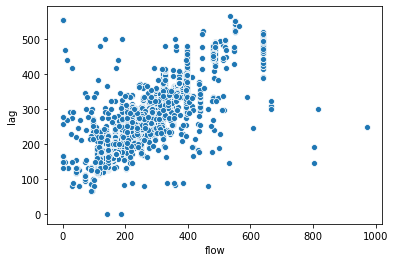

In [357]:
sns.scatterplot(x = 'flow', y = 'lag', data = g)

In [100]:
Toplot=RotterdamDet
spacial_val=[]   
for j in range (10998,(len(pois_and_detec))):
    spacial_val.append(sum(w[j].values()))
RotterdamDet['spacial_val']=spacial_val

In [101]:
RotterdamDet.loc[:,'spacial_val']

0      184.0
1       86.0
2      285.0
3      285.0
4      110.0
       ...  
254    163.0
255    103.0
256    103.0
257     32.0
258    243.0
Name: spacial_val, Length: 259, dtype: float64

The shape of the x and y train sets are respectively: (259, 1) and (259,)
The shape of the x and y test value sets are respectively: (259, 1) and (259,)
R^2 = 9.7617e-05
The regression.score = 9.761718953960052e-05
MSE of test values=  26866.625991823767
MSE of train values= 26866.625991823767
Coefficients: 
 0.02090404543191064 257.0155171675335


Text(0.5, 0, 'Sum spatial weights')

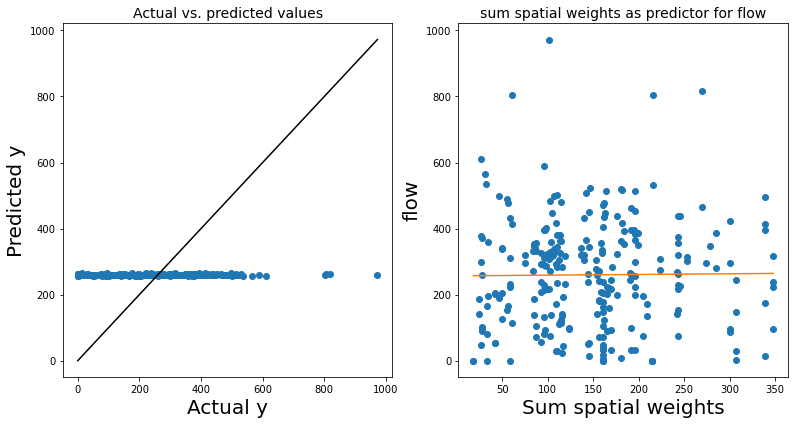

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
#set 2016 as train data
y_train = np.array(RotterdamDet.loc[:,'flow'])
X_train = np.array(RotterdamDet.loc[:,'spacial_val'])
X_train = X_train.reshape(X_train.shape[0], 1)

#set 2017 as test data
y_test = np.array(RotterdamDet.loc[:,'flow'])
X_test = np.array(RotterdamDet.loc[:,'spacial_val'])
X_test = X_test.reshape(X_test.shape[0], 1)

# Check shapes of train and test sets
print('The shape of the x and y train sets are respectively:', X_train.shape, 'and', y_train.shape)

print('The shape of the x and y test value sets are respectively:', X_test.shape,'and', y_test.shape)

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)

#print relevant values
print(f'R^2 = {r2:.5}')

print('The regression.score =',regression.score(X_train, y_train))

print('MSE of test values= ',mean_squared_error(predicted_y, y_test))
print('MSE of train values=',mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

#start plotting
#two figures, next to each other
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,6.5))

#plot test vs predicted values in left figure
ax1.plot(y_test, predicted_y, 'o')
#set grid limits
grid = np.linspace(np.min(RotterdamDet.loc[:,'flow']), np.max(RotterdamDet.loc[:,'flow']), 100)
ax1.plot(grid, grid, color="black") # add 45 degree line

#set title and labels
ax1.set_xlabel("Actual y", fontsize=20)
ax1.set_ylabel("Predicted y", fontsize=20)
ax1.set_title("Actual vs. predicted values", fontsize=14)

#plot x against y
ax2.plot(RotterdamDet.loc[:,'spacial_val'], RotterdamDet.loc[:,'flow'], 'o')
#set grid limits
xgrid = np.linspace(np.min(RotterdamDet.loc[:,'spacial_val']), np.max(RotterdamDet.loc[:,'spacial_val']), 100)
#plot calculated linear function
ax2.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))

#set title and labels
ax2.set_title("sum spatial weights as predictor for flow", fontsize=14)
ax2.set_ylabel("flow", fontsize=20)
ax2.set_xlabel("Sum spatial weights", fontsize=20)